# Loan Risk 

## Loading Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Displaying floats rounded to two decimal places

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Loading dataset

df = pd.read_csv(r"D:\Data Analysis\Datasets\credit.csv")

In [4]:
# Preview of dataset

df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [5]:
# Shape of dataset

df.shape

(1000, 17)

In [6]:
# Basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

We observe that each column has 1000 non-null entries. Thus, there are no missing values within our dataset

In [7]:
# Numerical summary

df.describe(include='number')

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.85,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


In [8]:
# Categorical summary

df.describe(exclude='number')

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,6,5,5,3,3,4,2,2
top,unknown,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,no
freq,394,530,473,603,339,814,713,630,596,700


## Data Preprocessing

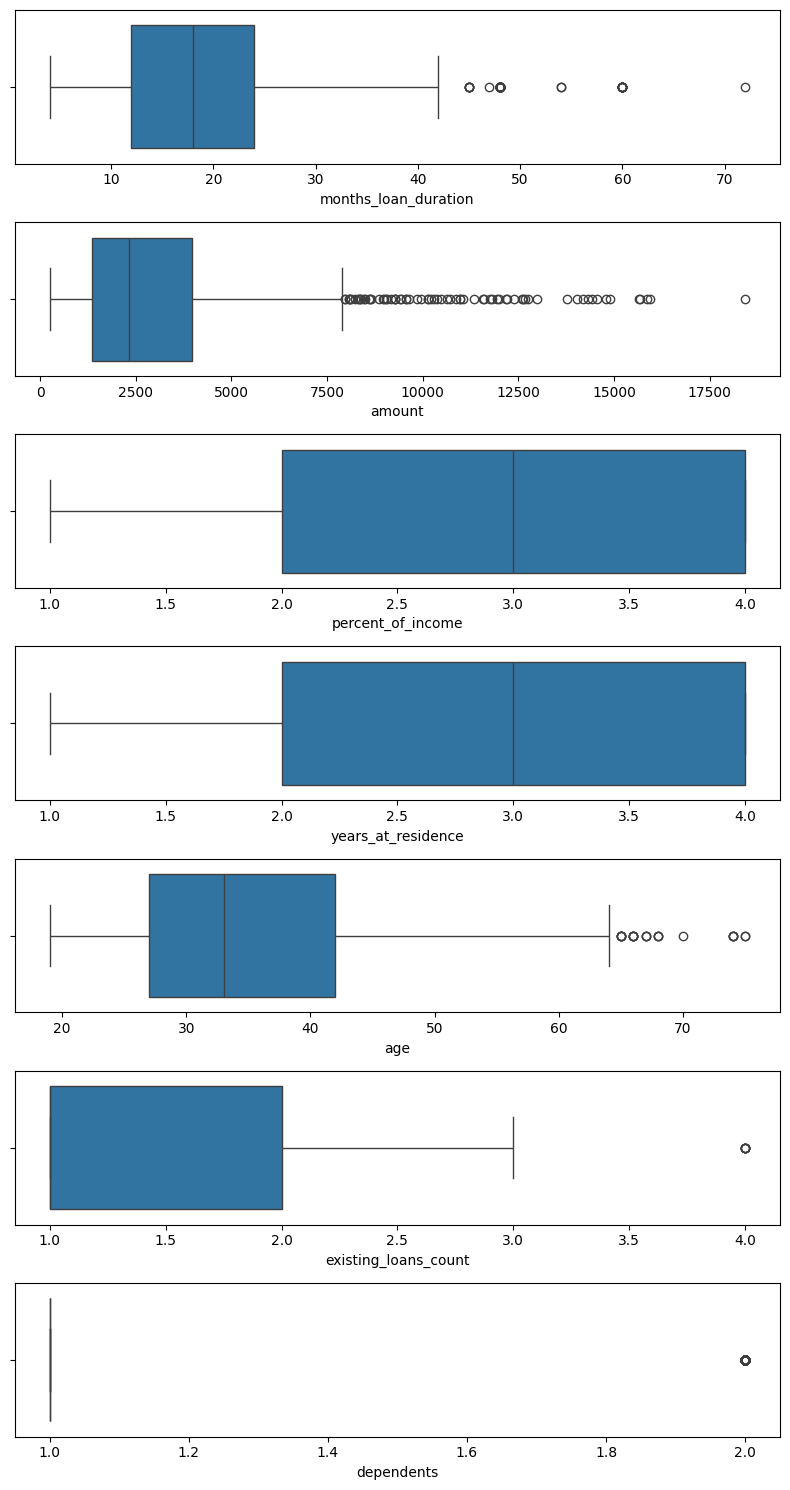

In [9]:
# Checking outliers

num_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(7, 1, figsize=(8, 15))
row = 0

for col in num_cols:
    sns.boxplot(data = df[col], ax = axes[row], orient='h')
    row += 1

plt.tight_layout()
plt.show()

In [10]:
# Dropping outliers

q1, q3 = np.percentile(df['months_loan_duration'], [25, 75])
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_out = df[(df['months_loan_duration'] >= lower_bound) & (df['months_loan_duration'] <= upper_bound)]

for col in num_cols[1:]:
    q1, q3 = np.percentile(df_out[col], [25, 75])
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]

df_out = df_out.reset_index().drop(columns = 'index')
df_out

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
1,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
2,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
3,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes
4,1 - 200 DM,12,good,car,1295,< 100 DM,< 1 year,3,1,25,none,rent,1,skilled,1,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,< 0 DM,36,good,furniture/appliances,3959,< 100 DM,unemployed,4,3,30,none,own,1,management,1,yes,no
698,unknown,12,good,car,2390,unknown,> 7 years,4,3,50,none,own,1,skilled,1,yes,no
699,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
700,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no


In [11]:
# Encoding categorical variables

from sklearn.preprocessing import OneHotEncoder

cat_cols = df.select_dtypes(include='object').columns.tolist()

encoder = OneHotEncoder(sparse_output= False)

# Encoding all categorical columns up to but not including 'default' column

one_hot_encoded = encoder.fit_transform(df_out[cat_cols[:-1]])

df_cat_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(df_out[cat_cols[:-1]].columns))

df_encoded = pd.concat([df_cat_encoded, df_out], axis = 1).drop(columns=df[cat_cols[:-1]])

df_encoded

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,...,phone_no,phone_yes,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default
0,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,24,2835,3,4,53,1,1,no
1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,36,6948,2,2,35,1,1,no
2,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,12,3059,2,4,61,1,1,no
3,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,30,5234,4,2,28,2,1,yes
4,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,12,1295,3,1,25,1,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,36,3959,4,3,30,1,1,no
698,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,12,2390,4,3,50,1,1,no
699,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,12,1736,3,4,31,1,1,no
700,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,30,3857,4,4,40,1,1,no


In [12]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

## Exploratory Data Analysis

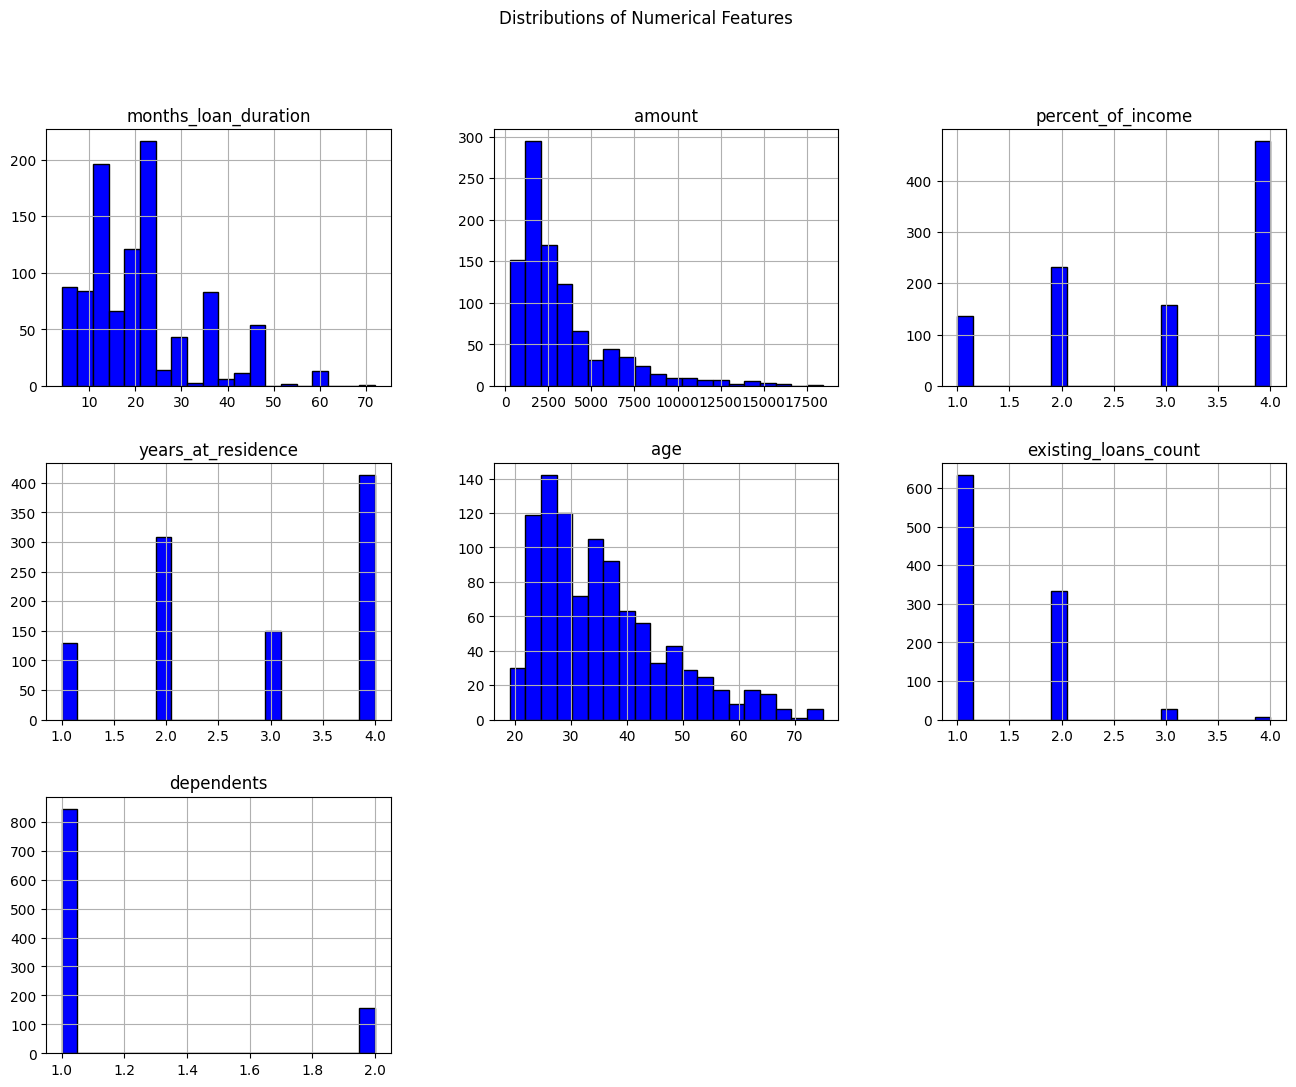

In [13]:
# Distribution of numerical columns

df[num_cols].hist(figsize=(16, 12), bins=20, edgecolor='black', color='blue')
plt.suptitle('Distributions of Numerical Features')
plt.show()

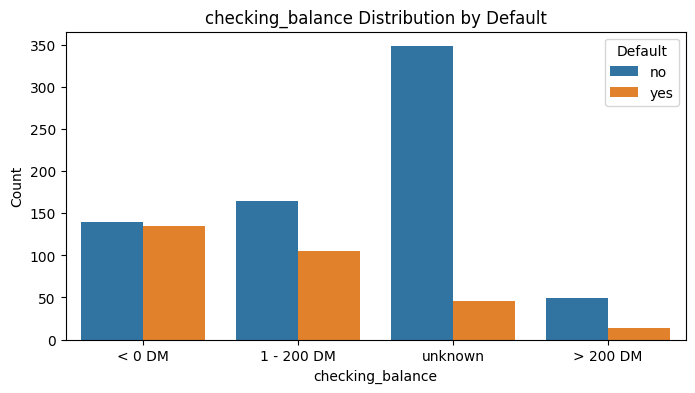

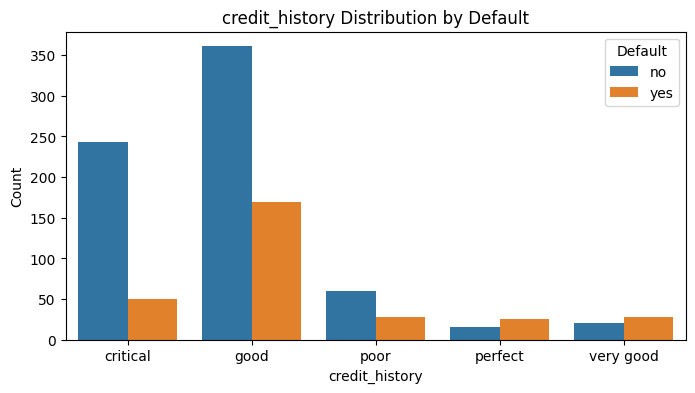

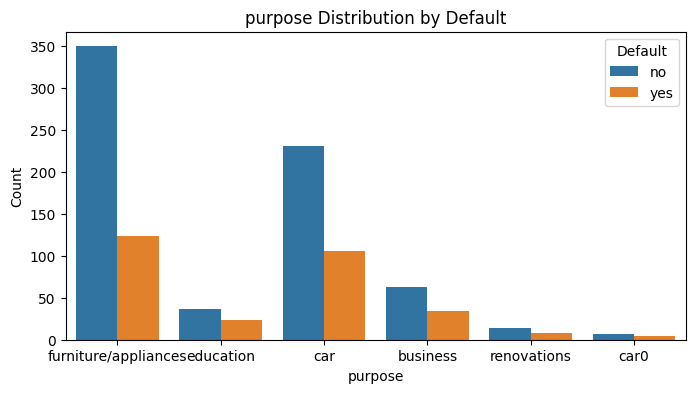

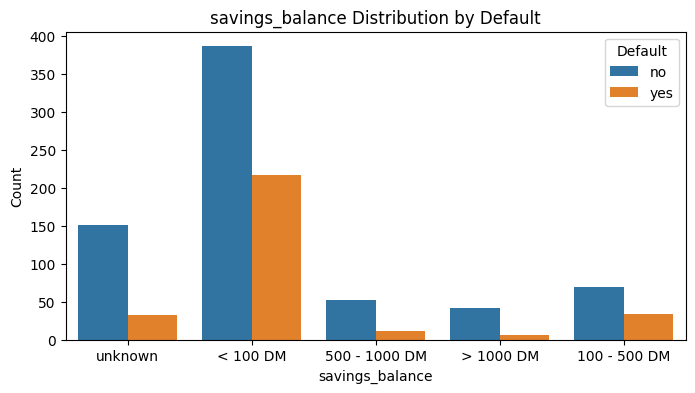

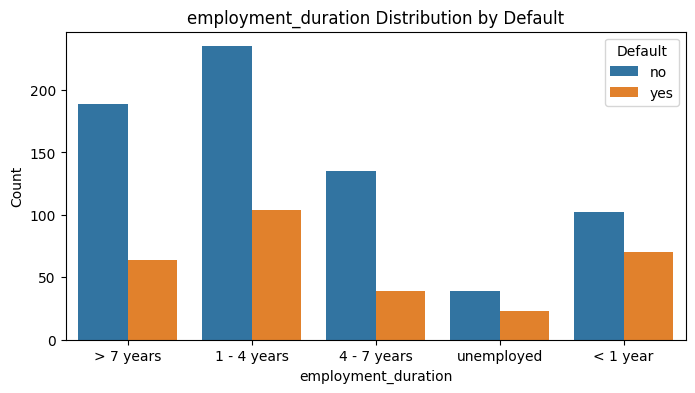

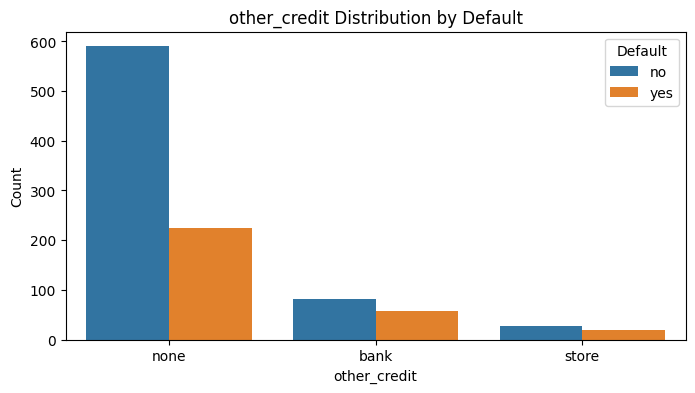

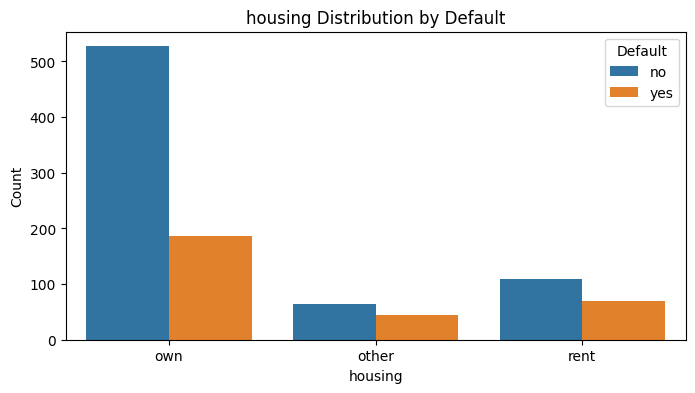

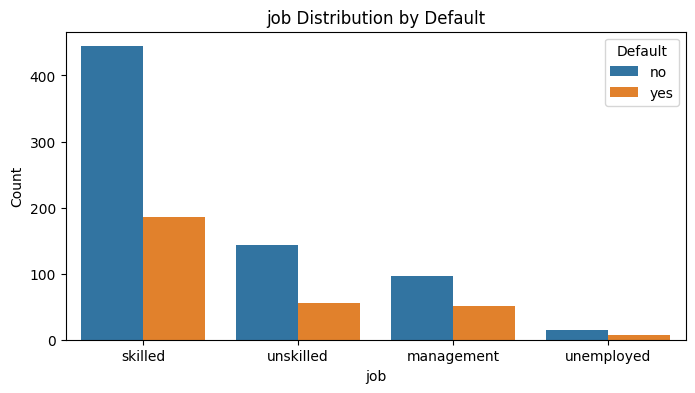

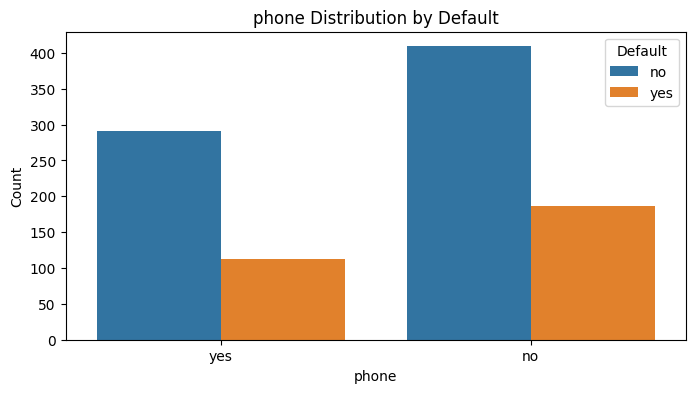

In [14]:
# Categorical Variable Analysis

for col in cat_cols[:-1]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x = col, data = df, hue = 'default')
    plt.title(f'{col} Distribution by Default')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title = 'Default', loc='upper right')
    plt.show()

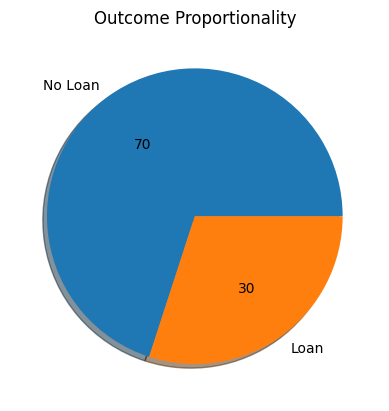

In [15]:
# Outcome Probability

plt.pie(x = df['default'].value_counts(), labels = ['No Loan', 'Loan'], autopct = '%.f', shadow = True)
plt.title('Outcome Proportionality')
plt.show()

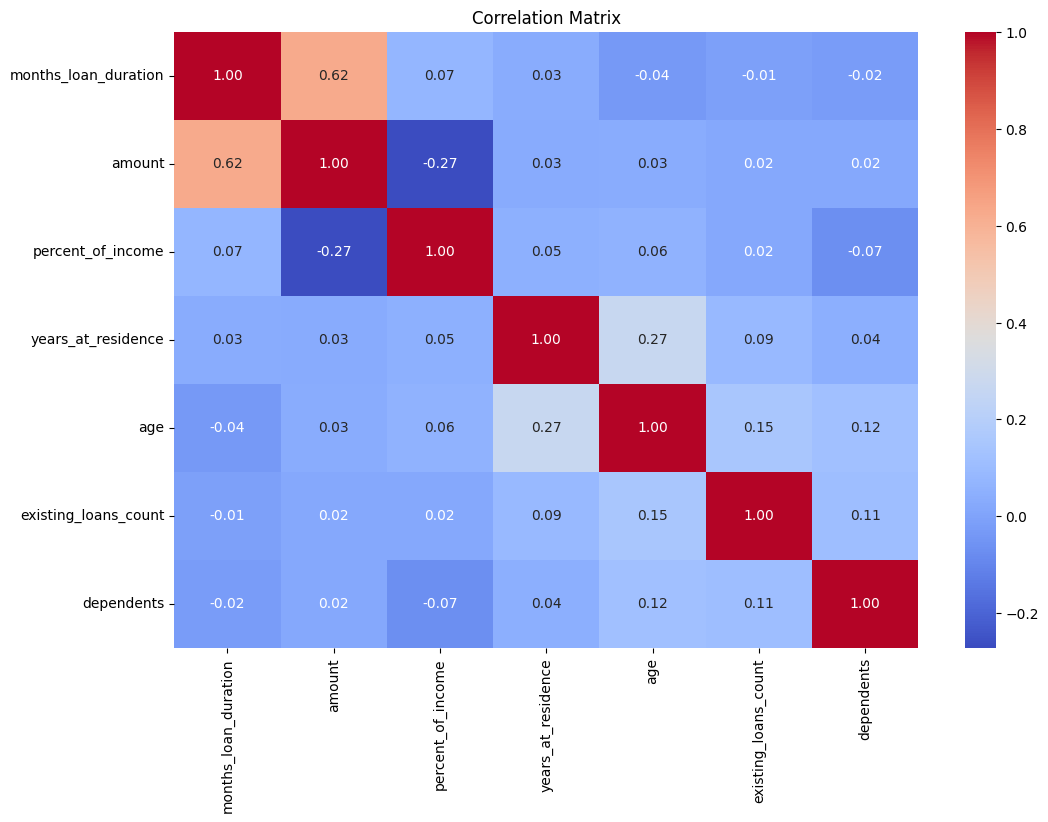

In [16]:
# Correlation Matrix

corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap='coolwarm', cbar = True)
plt.title('Correlation Matrix')
plt.show()

## ML Models

In [17]:
# Splitting the dataset into feature matrix (X) and target vector (y)

from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='default')
y = df_encoded['default']

#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

We will be considering the following models:
- Logistic Regression
- SVM
- Random Forest

In [18]:
# Training multiple models using cross-validation 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initializing models

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=5),
    'SVM': SVC(kernel='linear')
}

# Checking cross-validation scores

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy = {np.mean(scores):.4f}')


Logistic Regression: Mean Accuracy = 0.7861
Random Forest: Mean Accuracy = 0.7772
SVM: Mean Accuracy = 0.7719


The results show that, on average, the Logistic Regression model is the most accurate out of the three.

In [19]:
# Evaluating the Logistic Regression model

from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

          no       0.78      0.84      0.81       104
         yes       0.41      0.32      0.36        37

    accuracy                           0.70       141
   macro avg       0.60      0.58      0.58       141
weighted avg       0.68      0.70      0.69       141



Our model gives us an accuracy of 70%.

## Conclusion

The Logistic Regression model achieved an accuracy of 70% in predicting whether or not an indivisual is likely to receive a loan. While this result indicates a reasonable level of predictive performance, it also highlights that there is room for improvement.

To further improve prediction accuracy and model reliability, we may consider the following:

1. Feature Engineering:
    - Introducing additional features derived from existing data, such as debt-to-income ratios or interaction terms

2. Model Optimization:
    - Perform hyperparameter tuning to optimize the Logistic Regression model.

3. Balanced Dataset:
    - If the dataset is imbalanced, use techniques like oversampling, undersampling, or class weighting to ensure the model does not favour the majority class

4. Cross-Validation:
    - Employ cross-validation techniques to evaluate the model's robustness and reduce the risk of overfitting